<a href="https://colab.research.google.com/github/yDaraAlves/Ci-ncias-de-Dados/blob/main/Challenge_ONE_Data_Science_Alura_Store.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento



In [15]:
# Faturamento total de cada loja.
loja['Loja'] = 'Loja 1'
loja2['Loja'] = 'Loja 2'
loja3['Loja'] = 'Loja 3'
loja4['Loja'] = 'Loja 4'

print("Coluna 'Loja' adicionada a cada DataFrame.")

Coluna 'Loja' adicionada a cada DataFrame.


In [19]:
df_combine_lojas = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)
print("Todos os DataFrames das lojas combinados em 'df_combine_lojas'.")

Todos os DataFrames das lojas combinados em 'df_combine_lojas'.


In [21]:
receita_loja = df_combine_lojas.groupby('Loja')['Preço'].sum()
print("Faturamento total por loja:\n", receita_loja)

Faturamento total por loja:
 Loja
Loja 1    1534509.12
Loja 2    1488459.06
Loja 3    1464025.03
Loja 4    1384497.58
Name: Preço, dtype: float64


# 2. Vendas por Categoria

In [37]:

vendas_por_categoria_loja = df_combined_with_stores.groupby(['Store', 'Categoria do Produto']).size().reset_index(name='Quantidade de Vendas')

print('Quantidade de produtos vendidos por categoria em cada loja:')
for store in vendas_por_categoria_loja['Store'].unique():
    print(f'\n--- {store} ---')
    store_data = vendas_por_categoria_loja[vendas_por_categoria_loja['Store'] == store].sort_values(by='Quantidade de Vendas', ascending=False)
    display(store_data.head()) # Exibir as principais categorias de cada loja

Quantidade de produtos vendidos por categoria em cada loja:

--- Loja 1 ---


,Store,Categoria do Produto,Quantidade de Vendas
6,Loja 1,moveis,465
2,Loja 1,eletronicos,448
0,Loja 1,brinquedos,324
1,Loja 1,eletrodomesticos,312
3,Loja 1,esporte e lazer,284



--- Loja 2 ---


,Store,Categoria do Produto,Quantidade de Vendas
14,Loja 2,moveis,442
10,Loja 2,eletronicos,422
8,Loja 2,brinquedos,313
9,Loja 2,eletrodomesticos,305
11,Loja 2,esporte e lazer,275



--- Loja 3 ---


,Store,Categoria do Produto,Quantidade de Vendas
22,Loja 3,moveis,499
18,Loja 3,eletronicos,451
16,Loja 3,brinquedos,315
17,Loja 3,eletrodomesticos,278
19,Loja 3,esporte e lazer,277



--- Loja 4 ---


,Store,Categoria do Produto,Quantidade de Vendas
30,Loja 4,moveis,480
26,Loja 4,eletronicos,451
24,Loja 4,brinquedos,338
27,Loja 4,esporte e lazer,277
25,Loja 4,eletrodomesticos,254


# 3. Média de Avaliação das Lojas


In [35]:
media_avaliacoes_por_loja = df_combined_with_stores.groupby('Store')['Avaliação da compra'].mean()

print('Média de avaliações dos clientes por loja:\n')
print(media_avaliacoes_por_loja)


Média de avaliações dos clientes por loja:

Store
Loja 1    3.976685
Loja 2    4.037304
Loja 3    4.048326
Loja 4    3.995759
Name: Avaliação da compra, dtype: float64


# 4. Produtos Mais e Menos Vendidos

In [43]:
vendas_por_produto_loja = df_combined_with_stores.groupby(['Store', 'Categoria do Produto', 'Produto']).size().reset_index(name='Quantidade de Vendas')

print('Análise de Produtos Mais e Menos Vendidos por Loja:')
for store in vendas_por_produto_loja['Store'].unique():
    print(f'\n--- {store} ---')
    store_data = vendas_por_produto_loja[vendas_por_produto_loja['Store'] == store].sort_values(by='Quantidade de Vendas', ascending=False)

    print('\nProdutos Mais Vendidos:')
    display(store_data.head(5))

    print('\nProdutos Menos Vendidos:')
    display(store_data.tail(5))

Análise de Produtos Mais e Menos Vendidos por Loja:

--- Loja 1 ---

Produtos Mais Vendidos:


,Store,Categoria do Produto,Produto,Quantidade de Vendas
11,Loja 1,eletrodomesticos,Micro-ondas,60
41,Loja 1,moveis,Guarda roupas,60
21,Loja 1,eletronicos,TV Led UHD 4K,60
12,Loja 1,eletrodomesticos,Secadora de roupas,58
40,Loja 1,moveis,Cômoda,56



Produtos Menos Vendidos:


,Store,Categoria do Produto,Produto,Quantidade de Vendas
33,Loja 1,livros,Ciência de dados com python,39
31,Loja 1,instrumentos musicais,Pandeiro,36
50,Loja 1,utilidades domesticas,Panela de pressão,35
17,Loja 1,eletronicos,Headset,33
14,Loja 1,eletronicos,Celular ABXY,33



--- Loja 2 ---

Produtos Mais Vendidos:


,Store,Categoria do Produto,Produto,Quantidade de Vendas
86,Loja 2,livros,Iniciando em programação,65
62,Loja 2,eletrodomesticos,Micro-ondas,62
80,Loja 2,instrumentos musicais,Bateria,61
82,Loja 2,instrumentos musicais,Pandeiro,58
83,Loja 2,instrumentos musicais,Violão,58



Produtos Menos Vendidos:


,Store,Categoria do Produto,Produto,Quantidade de Vendas
67,Loja 2,eletronicos,Fone de ouvido,37
96,Loja 2,moveis,Poltrona,35
69,Loja 2,eletronicos,Impressora,34
95,Loja 2,moveis,Mesa de jantar,34
56,Loja 2,brinquedos,Jogo de tabuleiro,32



--- Loja 3 ---

Produtos Mais Vendidos:


,Store,Categoria do Produto,Produto,Quantidade de Vendas
144,Loja 3,moveis,Kit banquetas,57
141,Loja 3,moveis,Cama king,56
146,Loja 3,moveis,Mesa de jantar,56
142,Loja 3,moveis,Cômoda,55
151,Loja 3,utilidades domesticas,Jogo de panelas,55



Produtos Menos Vendidos:


,Store,Categoria do Produto,Produto,Quantidade de Vendas
132,Loja 3,instrumentos musicais,Guitarra,38
130,Loja 3,esporte e lazer,Mochila,36
113,Loja 3,eletrodomesticos,Micro-ondas,36
150,Loja 3,utilidades domesticas,Jogo de copos,36
102,Loja 3,brinquedos,Blocos de montar,35



--- Loja 4 ---

Produtos Mais Vendidos:


,Store,Categoria do Produto,Produto,Quantidade de Vendas
191,Loja 4,moveis,Cama box,62
200,Loja 4,utilidades domesticas,Faqueiro,59
187,Loja 4,livros,Dashboards com Power BI,56
192,Loja 4,moveis,Cama king,56
155,Loja 4,brinquedos,Carrinho controle remoto,55



Produtos Menos Vendidos:


,Store,Categoria do Produto,Produto,Quantidade de Vendas
163,Loja 4,eletrodomesticos,Lavadora de roupas,38
186,Loja 4,livros,Ciência de dados com python,38
185,Loja 4,instrumentos musicais,Violão,37
194,Loja 4,moveis,Guarda roupas,34
183,Loja 4,instrumentos musicais,Guitarra,33


# 5. Frete Médio por Loja

In [42]:
media_frete_por_loja = df_combined_with_stores.groupby('Store')['Frete'].mean()

print('Custo médio de frete por loja:\n')
print(media_frete_por_loja)

Custo médio de frete por loja:

Store
Loja 1    34.691805
Loja 2    33.621941
Loja 3    33.074464
Loja 4    31.278997
Name: Frete, dtype: float64


#Visualização

In [44]:
import matplotlib.pyplot as plt #importando a biblioteca matplotlib

print("matplotlib.pyplot imported as plt.")

matplotlib.pyplot imported as plt.


Agora que o matplotlib está importado, criarei um gráfico de barras para a receita total por loja usando a série `receita_loja`, conforme especificado nas instruções. Isso fornecerá uma representação visual do desempenho financeiro de cada loja.


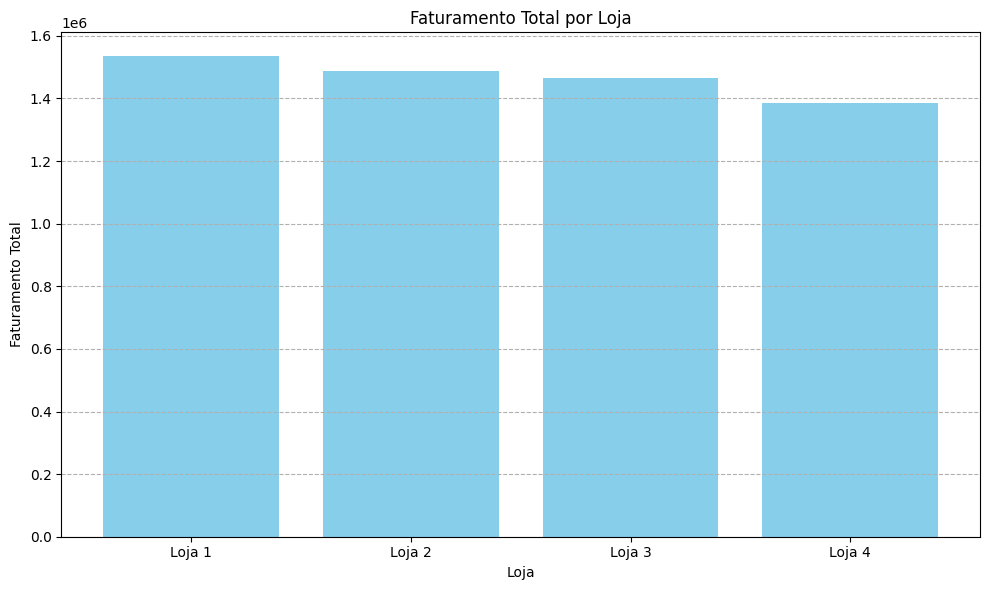

Gráfico de barras representando a receita total por loja.


In [51]:
plt.figure(figsize=(10, 6))
plt.bar(receita_loja.index, receita_loja.values, color='skyblue')
plt.xlabel('Loja')
plt.ylabel('Faturamento Total')
plt.title('Faturamento Total por Loja')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

print("Gráfico de barras representando a receita total por loja.")

Gráfico de barras para visualizar as avaliações médias dos clientes para cada loja usando a série `media_avaliacoes_por_loja`. Isso permitirá uma comparação rápida da satisfação do cliente entre as lojas.



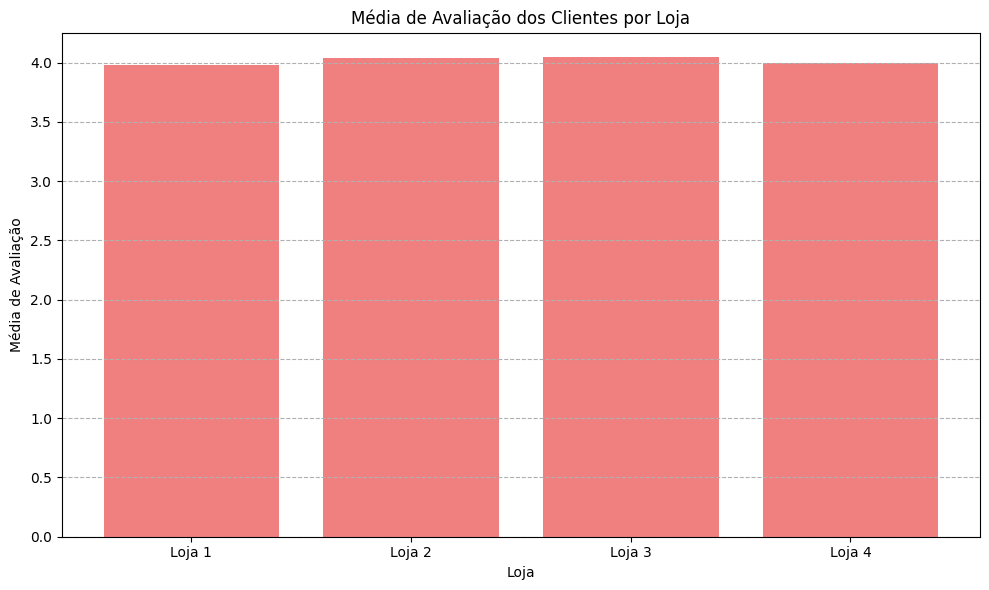

Gráfico de barras com a média das avaliações dos clientes por loja.


In [52]:
plt.figure(figsize=(10, 6))
plt.bar(media_avaliacoes_por_loja.index, media_avaliacoes_por_loja.values, color='lightcoral')
plt.xlabel('Loja')
plt.ylabel('Média de Avaliação')
plt.title('Média de Avaliação dos Clientes por Loja')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

print("Gráfico de barras com a média das avaliações dos clientes por loja.")

Gráfico de barras para visualizar os custos médios de frete para cada loja usando a série media_frete_por_loja, conforme as instruções. Isso ilustrará as tendências de custos de frete entre as lojas.


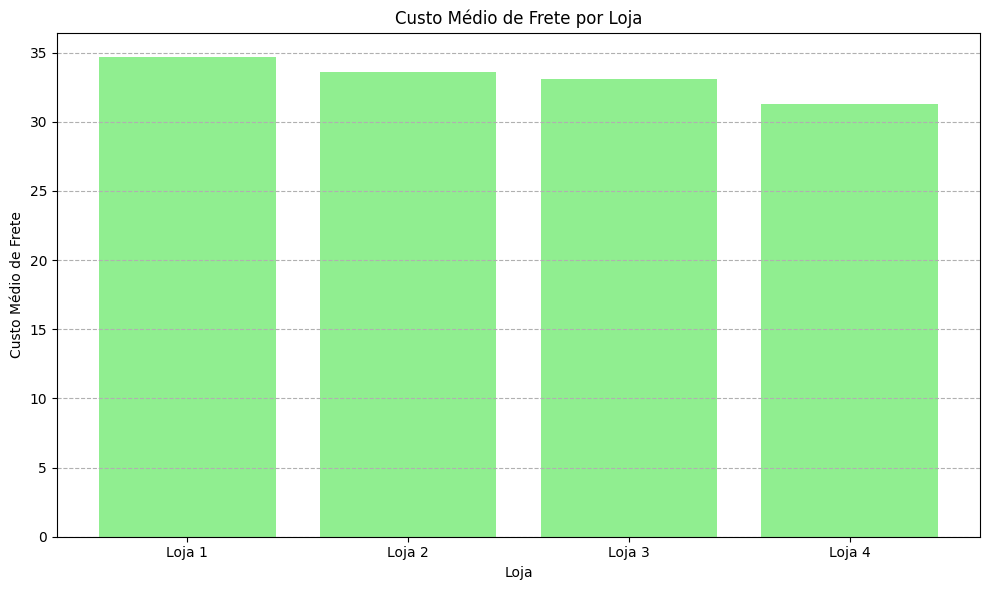

Gráfico de barras com a representação gráfica dos custos médios de frete por loja.


In [53]:
plt.figure(figsize=(10, 6))
plt.bar(media_frete_por_loja.index, media_frete_por_loja.values, color='lightgreen')
plt.xlabel('Loja')
plt.ylabel('Custo Médio de Frete')
plt.title('Custo Médio de Frete por Loja')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

print("Gráfico de barras com a representação gráfica dos custos médios de frete por loja.")

DataFrame vendas_por_categoria_loja para prepará-lo para a criação de um gráfico de barras empilhadas. Isso envolve definir 'Store' como índice, 'Categoria do Produto' como colunas e 'Quantidade de Vendas' como valores, armazenando o resultado em vendas_pivotadas.



In [54]:
vendas_pivotadas = vendas_por_categoria_loja.pivot_table(index='Store', columns='Categoria do Produto', values='Quantidade de Vendas')

print("DataFrame 'vendas_pivotadas' created:")
display(vendas_pivotadas.head())

DataFrame 'vendas_pivotadas' created:


Categoria do Produto,brinquedos,eletrodomesticos,eletronicos,esporte e lazer,instrumentos musicais,livros,moveis,utilidades domesticas
Store,,,,,,,,
Loja 1,324.0,312.0,448.0,284.0,182.0,173.0,465.0,171.0
Loja 2,313.0,305.0,422.0,275.0,224.0,197.0,442.0,181.0
Loja 3,315.0,278.0,451.0,277.0,177.0,185.0,499.0,177.0
Loja 4,338.0,254.0,451.0,277.0,170.0,187.0,480.0,201.0


Gráfico de barras empilhadas a partir do DataFrame vendas_pivotadas, conforme instruído. Isso visualizará a quantidade de produtos vendidos por categoria para cada loja, incluindo uma legenda para as categorias de produtos.



<Figure size 1200x700 with 0 Axes>

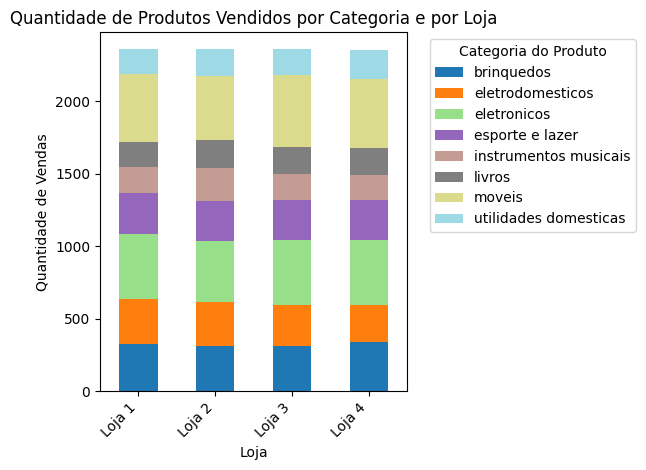

Gráfico de barras empilhadas mostrando as vendas de produtos por categoria e loja.


In [55]:
plt.figure(figsize=(12, 7))
vendas_pivotadas.plot(kind='bar', stacked=True, colormap='tab20')
plt.xlabel('Loja')
plt.ylabel('Quantidade de Vendas')
plt.title('Quantidade de Produtos Vendidos por Categoria e por Loja')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Categoria do Produto', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

print("Gráfico de barras empilhadas mostrando as vendas de produtos por categoria e loja.")

# Relatório de Análise para Decisão de Venda de Loja

## Introdução

Após realizarmos uma análise detalhada das lojas do Senhor João, chegamos a uma decisão referente às quatro unidades avaliadas. Fizemos um levantamento completo dos dados de vendas, faturamento, avaliações dos clientes, categorias de produtos e custos de frete de cada loja, buscando construir uma visão clara e abrangente de todo o contexto.

#Análise Detalhada por Loja
##1. Faturamento Total das Lojas

Com base no gráfico de “Faturamento Total por Loja” e nos valores analisados, temos:

* Loja 1: R$ 1.534.509,12 (maior faturamento)

* Loja 2: R$ 1.488.459,06

* Loja 3: R$ 1.464.025,03

* Loja 4: R$ 1.384.497,58 (menor faturamento)

A Loja 1 se destaca como a unidade com melhor desempenho financeiro, enquanto a Loja 4 apresenta os menores resultados em receita bruta.

##2. Categorias de Produtos Mais e Menos Vendidas

A análise do gráfico de barras empilhadas de “Quantidade de Produtos Vendidos por Categoria e por Loja”, junto dos dados individuais por categoria, revela alguns padrões importantes:

* Visão Geral

As categorias Móveis, Eletrônicos e Brinquedos são as mais vendidas em praticamente todas as lojas.

* Por Loja

* Loja 1: Destaque para Móveis e Eletrônicos. Entre os produtos menos vendidos estão Ciência de dados com Python, Pandeiro e Panela de pressão.

* Loja 2: Móveis e Eletrônicos também lideram as vendas. Já Jogo de tabuleiro, Mesa de jantar e Impressora aparecem com menor saída.

* Loja 3: Móveis é a categoria mais forte. Entre os itens menos procurados estão Blocos de montar e Jogo de copos.

* Loja 4: Mantém bom desempenho em Móveis e Eletrônicos. Guitarra e Guarda-roupas (em uma versão menos popular) figuram entre os produtos de menor venda.

##3. Média das Avaliações de Clientes por Loja

Segundo o gráfico de “Média de Avaliação dos Clientes por Loja”, temos:

* Loja 1: 3,98

* Loja 2: 4,04

* Loja 3: 4,05 (maior média)

* Loja 4: 4,00

A Loja 3 se destaca com o melhor índice de satisfação entre os clientes. De forma geral, todas as lojas mantêm médias positivas, acima de 3,9.

##4. Produtos Mais e Menos Vendidos (Detalhado)

A análise individual por produto mostra o seguinte cenário:

* Loja 1: Micro-ondas e Guarda-roupas estão entre os mais vendidos, enquanto Headset e Celular ABXY têm baixa procura.

* Loja 2: Destaque para Iniciando em Programação e Micro-ondas. Jogo de tabuleiro e Impressora aparecem como itens fracos em vendas.

* Loja 3: Kit banquetas e Cama king têm ótimo desempenho. Blocos de montar e Jogo de copos estão entre os menos vendidos.

* Loja 4: Cama box e Faqueiro se destacam. Guitarra e Guarda-roupas (modelo pouco procurado) aparecem com baixo volume de vendas.

##5. Frete Médio de Cada Loja

Com base no gráfico de “Custo Médio de Frete por Loja”, observamos:

* Loja 1: R$ 34,69 (maior custo médio)

* Loja 2: R$ 33,62

* Loja 3: R$ 33,07

* Loja 4: R$ 31,28 (menor custo médio)

Apesar de o frete ser pago pelo cliente, valores mais altos podem influenciar a decisão de compra e a percepção de custo-benefício. Nesse aspecto, a Loja 1 apresenta o frete mais elevado, enquanto a Loja 4 possui o mais acessível.

## Conclusão e Recomendação

Após analisar faturamento, avaliações dos clientes e custos operacionais, foi possível identificar os pontos fortes e fracos de cada loja. A Loja 1 se destaca por apresentar o maior faturamento entre todas, o que a torna muito atrativa para quem deseja investir em um negócio já consolidado. Mesmo possuindo o frete médio mais alto, isso não prejudicou seu desempenho de vendas, o que mostra uma operação forte e bem aceita pelo público.

* A Loja 3, embora não tenha o maior faturamento, lidera no quesito satisfação dos clientes. Isso indica uma reputação sólida e um relacionamento positivo com o consumidor, algo que agrega valor, mas pode não compensar totalmente a diferença de faturamento em relação à Loja 1.

* Já a Loja 4 tem o menor faturamento e o menor custo de frete, o que pode ser interpretado de duas formas: ou existe um potencial de crescimento pouco explorado, ou o mercado dessa unidade é menos aquecido.

* Diante de todas essas informações, a recomendação é que a Loja 1 seja escolhida para venda. Seu faturamento superior é o fator mais determinante, pois representa atratividade comercial e maior retorno financeiro. Além disso, não foram identificados problemas relevantes em satisfação do cliente ou mix de produtos que reduzam seu valor. Assim, a Loja 1 apresenta o melhor conjunto de indicadores para uma negociação vantajosa para o Senhor João.